In [356]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [357]:
import numpy as np
import pandas as pd

In [358]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [359]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [360]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [361]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [362]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [363]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [364]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [365]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [366]:
inspector = inspect(engine)
inspector.get_table_names()


columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [367]:
# Calculate the date 1 year ago from the last data point in the database

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [368]:
# Perform a query to retrieve the data and precipitation scores

measurement_results=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.prcp).\
    order_by(Measurement.date.desc()).all()


In [369]:

prcp_date = [measurement_results[1] for result in measurement_results]
prcp_amt = [measurement_results[2] for result in measurement_results]

print(prcp_date)
print ("-----")
print(prcp_amt)

[('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08-23', 0.45), ('2017-08

In [370]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

prcp_df = pd.DataFrame(measurement_results[:], columns=['prcp_date', 'prcp_amt'])
prcp_df.set_index('prcp_date', inplace=False)
prcp_df.sort_values(by=['prcp_date'], inplace=True)
prcp_df.head(10)


,prcp_date,prcp_amt
1141,2016-08-24,1.45
1136,2016-08-24,0.08
1137,2016-08-24,2.15
1140,2016-08-24,2.15
1139,2016-08-24,1.22
1138,2016-08-24,2.28
1134,2016-08-25,0.06
1131,2016-08-25,0.08
1135,2016-08-25,0.11
1133,2016-08-25,0.21


In [371]:
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1142 entries, 1141 to 0
Data columns (total 2 columns):
prcp_date    1142 non-null object
prcp_amt     1142 non-null float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


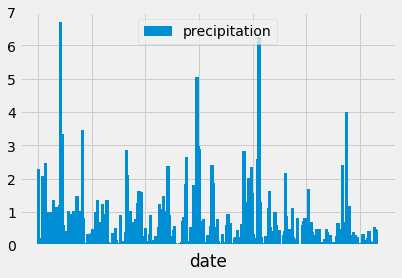

<Figure size 432x288 with 0 Axes>

In [372]:
# Use Pandas Plotting with Matplotlib to plot the data

#plt.figure()
fig, ax = plt.subplots()
plt.bar(prcp_df["prcp_date"], prcp_df["prcp_amt"],width=3)
plt.grid(True)
plt.xscale('linear')
plt.xlabel("date")
ax.set_xticklabels([])
plt.yticks([0,1,2,3,4,5,6,7])
plt.ylim(ymax=7)
plt.legend(['precipitation'],loc=9)


#ax.axis()
#ax.grid(True)

plt.show()
plt.tight_layout()

![precipitation](Images/precipitation.png)

In [373]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp_amt
count,1142.000000
mean,0.311357
std,0.576134
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [374]:
inspector = inspect(engine)
inspector.get_table_names()


station_columns = inspector.get_columns('Station')
for station_col in station_columns:
    print(station_col['name'], station_col["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [375]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [376]:
#how many times each station appears
session.query(Measurement.station,(func.count(Measurement.station))).group_by(Measurement.station).all()


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [377]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station,(func.count(Measurement.station))).group_by(Measurement.station)\
    .order_by((func.count(Measurement.station).desc())).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### Which station has the highest number of observations?

#### WAIHEE

In [379]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

waihee=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').all()
print(waihee)

[(54.0, 85.0, 71.66378066378067)]


In [380]:
temp_data=session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.tobs).\
    order_by(Measurement.date.desc()).all()


In [381]:
temp_df = pd.DataFrame(temp_data[:], columns=["msmt_date","msmt_station", "msmt_temp"])
temp_df.set_index('msmt_date', inplace=False)
temp_df.sort_values(by=['msmt_date'])
temp_df.head(10)

,msmt_date,msmt_station,msmt_temp
0,2017-08-18,USC00519281,79.0
1,2017-08-17,USC00519281,76.0
2,2017-08-16,USC00519281,76.0
3,2017-08-15,USC00519281,77.0
4,2017-08-14,USC00519281,77.0
5,2017-08-13,USC00519281,77.0
6,2017-08-06,USC00519281,83.0
7,2017-08-05,USC00519281,82.0
8,2017-08-04,USC00519281,77.0
9,2017-07-31,USC00519281,76.0


<function matplotlib.pyplot.show(*args, **kw)>

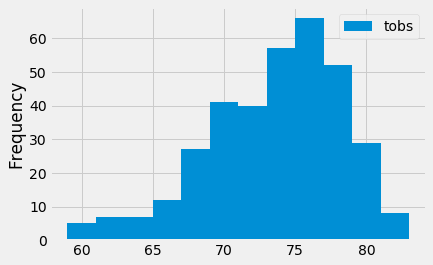

In [382]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


hist = temp_df.hist(bins=12)
plt.legend(['tobs'],loc=1)
plt.ylabel("Frequency")
plt.title("")

plt.show

![precipitation](Images/station-histogram.png)

In [383]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2013-02-28', '2013-03-05'))

[(60.0, 70.1590909090909, 75.0)]


In [384]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2012-07-04', '2012-07-18'))

[(70.0, 74.98181818181818, 82.0)]


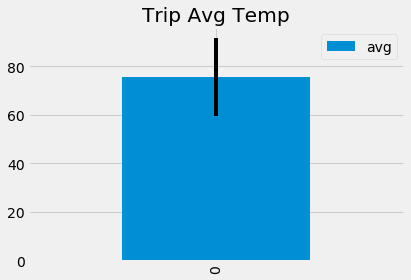

In [385]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


trip_df=pd.DataFrame(calc_temps('2013-07-04', '2013-07-18'), columns=["min", "avg", "max"])
trip_df.head(10)

yer=trip_df['max']-trip_df['min']

trip_df.plot(y='avg', kind='bar', title="Trip Avg Temp", yerr=yer)

In [444]:
type(Measurement.date)

sqlalchemy.orm.attributes.InstrumentedAttribute

In [499]:
def vac_temps(start_date, end_date):
    
    return session.query(Measurement.station, (func.sum(Measurement.prcp))).group_by(Measurement.station).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date)\
        .order_by((func.sum(Measurement.prcp).desc())).all()


vacay=vac_temps('2013-02-28', '2013-03-05')
vacay


[('USC00516128', 0.17),
 ('USC00519281', 0.03),
 ('USC00519523', 0.03),
 ('USC00511918', 0.0),
 ('USC00513117', 0.0),
 ('USC00514830', 0.0),
 ('USC00517948', 0.0),
 ('USC00519397', 0.0)]

In [577]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Station.station,
       Station.name,
       func.sum(Measurement.prcp), 
       Station.latitude, 
       Station.longitude, 
       Station.elevation]
rains = session.query(*sel).\
filter(Measurement.station== Station.station).group_by(Measurement.station).\
order_by((func.sum(Measurement.prcp).desc())).all()

print(*rains, sep='\n')

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 1068.0899999999997, 21.3331, -157.8025, 152.4)
('USC00519281', 'WAIHEE 837.5, HI US', 588.6400000000001, 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 382.6199999999998, 21.4234, -157.8015, 14.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 295.6800000000001, 21.33556, -157.71139, 19.5)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 234.49000000000007, 21.5213, -157.8374, 7.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 131.61999999999992, 21.2716, -157.8168, 3.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 92.67999999999995, 21.3152, -157.9992, 0.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 70.86999999999999, 21.4992, -158.0111, 306.6)
('USC00517948', 'PEARL CITY, HI US', 43.43999999999998, 21.3934, -157.9751, 11.9)


## following portion is bonus -- did not complete at this time.


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
